In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import datetime
import re
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

today = datetime.datetime.now().strftime("%Y-%m-%d")
print('Run date:', today)

Run date: 2024-07-25


# Data Import

In [3]:
df_eng = pd.read_csv('../responses-data/data_eng.csv')
df_eng

,Year,ID,Please indicate your graduation status.,Please provide your year of enrollment (graduation year for graduates),Are you currently employed?,Are you pursuing a major other than Library and Information Science(LIS)?,Did you have a career goal when you entered school?,What is your intended career path at the time of admission?,Do you currently have a career goal?,What career path do you intend to pursue currently?,...,How satisfied are you with your current job?,Would you recommend your current workplace to undergraduate students in the LIS?,"Are you considering going to graduate school, or have you already attended?",Which graduate school do you want to attend or have you attended?,"When do you plan to start graduate school, or when did you actually start your studies?",What is the purpose of attending graduate school?,What were some of the challenges you faced while getting ready for graduate school?,Why haven't you thought about attending graduate school?,Do you plan to go to graduate school in the future?,What graduate school are you interested in attending in the future?
0,2021,20210101,Undergraduate students,2019,NaN,N/Q,No,NaN,Yes,Private enterprise,...,NaN,NaN,No,NaN,NaN,NaN,NaN,Not interested in research,NaN,NaN
1,2021,20210102,Undergraduate students,2016,NaN,N/Q,No,NaN,Yes,Public enterprise,...,NaN,NaN,No,NaN,NaN,NaN,NaN,Not interested in research;High tuition fees,NaN,NaN
2,2021,20210103,Undergraduate students,2018,NaN,N/Q,Yes,Librarians;Teacher librarians;Archivist;Public...,Yes,Librarians;Government employees (except librar...,...,NaN,NaN,No,NaN,NaN,NaN,NaN,Not interested in research,NaN,NaN
3,2021,20210104,Undergraduate students,2019,NaN,N/Q,Yes,Librarians;Teacher librarians;Government emplo...,Yes,Teacher librarians,...,NaN,NaN,No,NaN,NaN,NaN,NaN,Not interested in research,NaN,NaN
4,2021,20210105,Undergraduate students,2019,NaN,N/Q,No,NaN,Yes,Other,...,NaN,NaN,No,NaN,NaN,NaN,NaN,Not interested in research,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2023,20230403,Job applicants,2023,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,No,NaN,NaN,NaN,NaN,Not interested in research;High tuition fees,Yes,LIS in same university as undergraduate
290,2023,20230404,Job applicants,2021,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,No,NaN,NaN,NaN,NaN,Not interested in research;High tuition fees,Yes,Other department in same university as undergr...
291,2023,20230405,Job applicants,2023,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,No,NaN,NaN,NaN,NaN,Lack of information about graduate school,No,NaN
292,2023,20230406,Job applicants,2022,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,No,NaN,NaN,NaN,NaN,High tuition fees,No,NaN


In [4]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 63 columns):
 #   Column                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                  --------------  ----- 
 0   Year                                                                                                                                                    294 non-null    int64 
 1   ID                                                                                                                                                      294 non-null    int64 
 2   Please indicate your graduation status.                                                                                                                 294 non-null    ob

# Data Visualization

## Career Paths

### Compare 'Q1: Did you have a career goal when you entered school?' and 'Q2: Do you have a current career path?'

In [17]:
def count_to(df, column_name, year_column):
    df = df.loc[~df[column_name].isin(['N/A', 'N/Q', 'E'])]

    series_copy = df[[year_column, column_name]].copy()
    series_copy.dropna(inplace=True)

    result_dict = {year: [] for year in series_copy[year_column].unique()}

    for index, row in series_copy.iterrows():
        year = row[year_column]
        words = re.split(',|;', row[column_name])
        result_dict[year].extend(words)

    result_dfs = []
    for year, words in result_dict.items():
        word_counts = pd.Series(words).value_counts().reset_index()
        word_counts.columns = ['Answer', 'Count']
        word_counts['Year'] = year
        result_dfs.append(word_counts)
        
    result_df = pd.concat(result_dfs, ignore_index=True)
    result_df['Percent'] = round(result_df.groupby('Year')['Count'].transform(lambda x: x / x.sum() * 100), 2)
    return result_df

df1_before = count_to(df_eng, 'Did you have a career goal when you entered school?', 'Year')
df1_after = count_to(df_eng, 'Do you currently have a career goal?', 'Year')

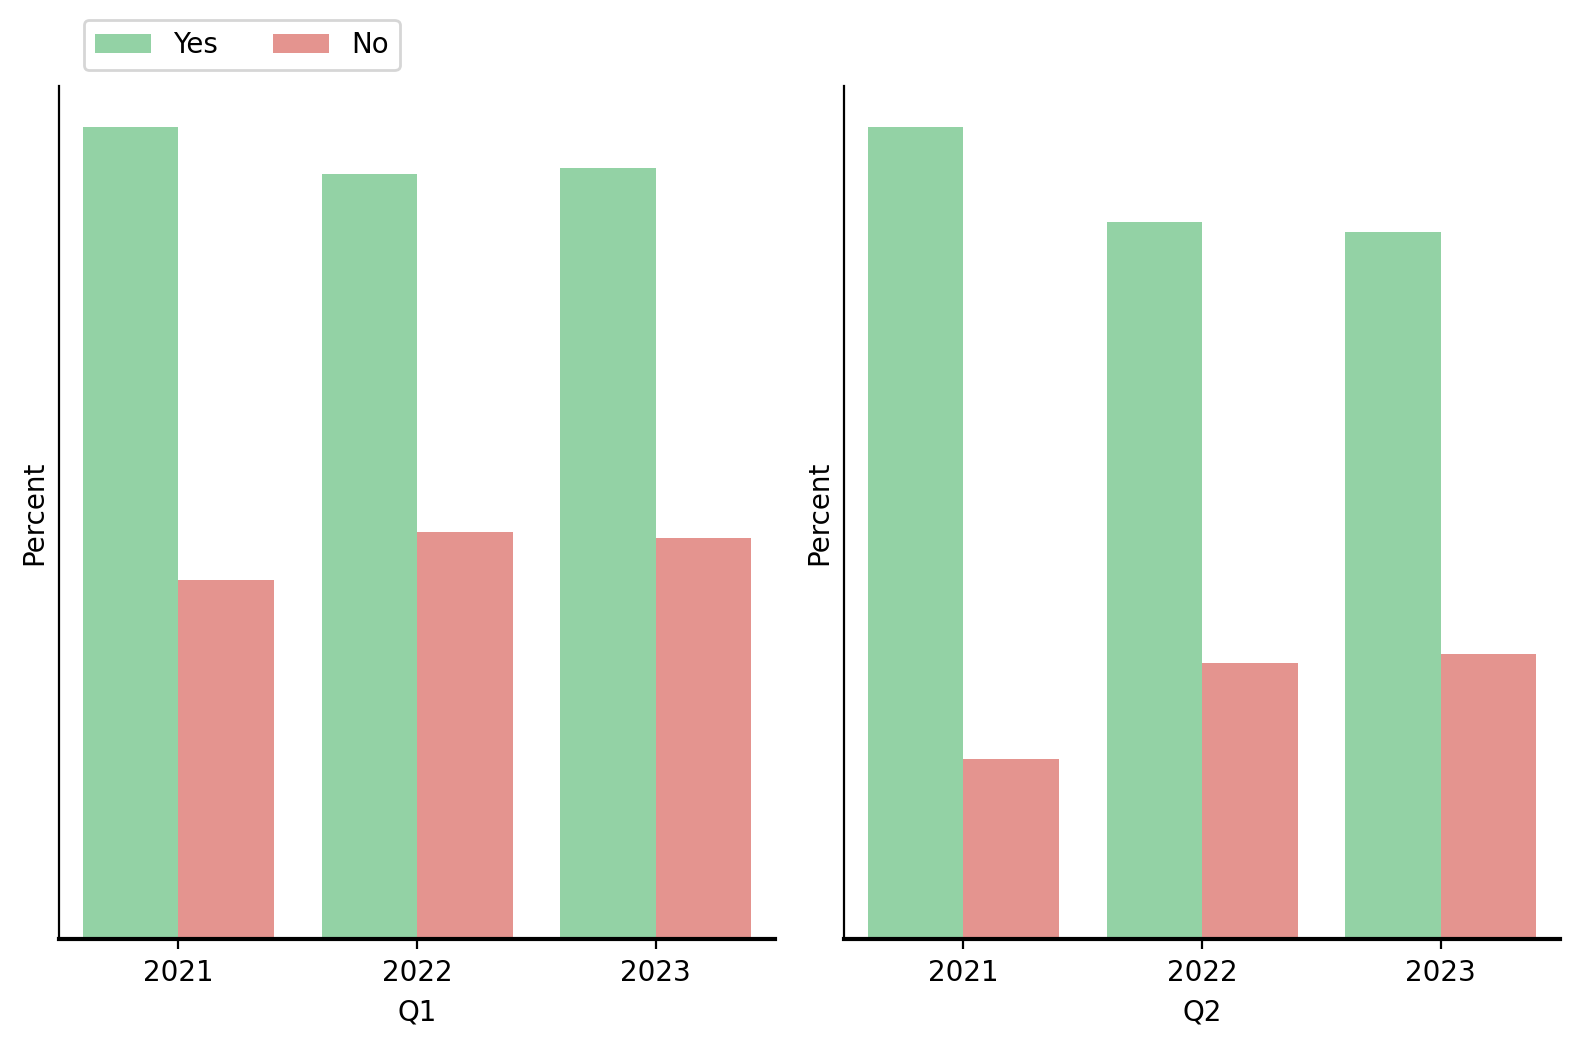

In [18]:
%config InlineBackend.figure_format = 'retina'

custom_palette=['#39c661','#ea382c']

f, (ax1, ax3) = plt.subplots(1, 2, figsize=(8, 5), sharex=True)

# Plot for the first subplot
sns.barplot(
    data=df1_before, x="Year", y="Percent", hue="Answer",
    errorbar=None, palette=custom_palette, alpha=.6, ax=ax1
)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Percent")
ax1.set_xlabel("Q1")
ax1.legend().remove()

# Plot for the second subplot
sns.barplot(
    data=df1_after, x="Year", y="Percent", hue="Answer",
    errorbar=None, palette=custom_palette, alpha=.6, ax=ax3
)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Percent")
ax3.set_xlabel("Q2")
ax3.legend().remove()

handles, labels = ax1.get_legend_handles_labels()
f.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.05, 1.05), shadow=False, ncol=2, prop={'size': 10})

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

plt.show()


### Compare 'Q1: At the time you were entered, what was your intended career path?' and 'Q2: What career path do you intended to pursue currently?'

In [19]:
df2_before = count_to(df_eng, 'What is your intended career path at the time of admission?', 'Year')
df2_after = count_to(df_eng, 'What career path do you intend to pursue currently?', 'Year')

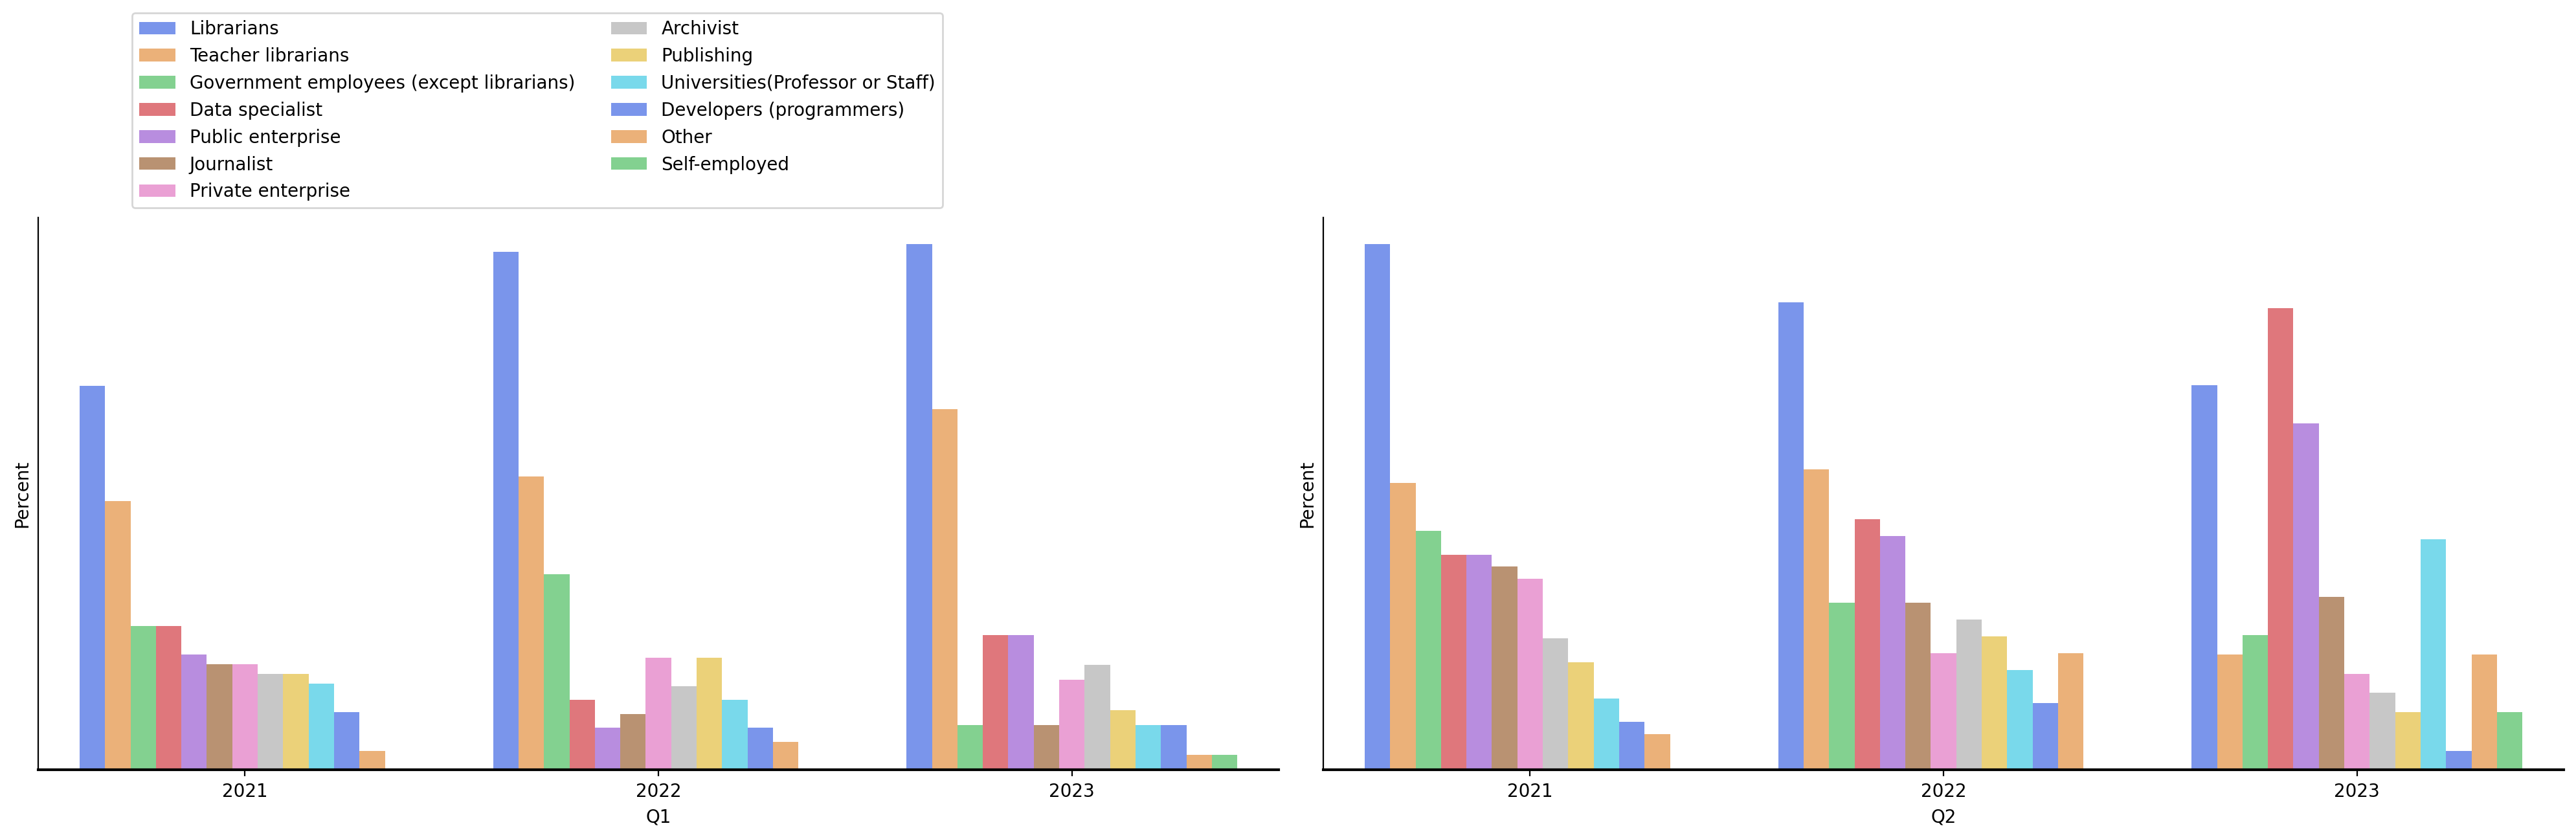

In [20]:
%config InlineBackend.figure_format = 'retina'

f, (ax1, ax3) = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

# Plot for the first subplot
sns.barplot(
    data=df2_before, x="Year", y="Percent", hue="Answer",
    errorbar=None, palette='bright', alpha=.6, ax=ax1
)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Percent")
ax1.set_xlabel("Q1")
ax1.legend().remove()

# Plot for the second subplot
sns.barplot(
    data=df2_after, x="Year", y="Percent", hue="Answer",
    errorbar=None, palette='bright', alpha=.6, ax=ax3
)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Percent")
ax3.set_xlabel("Q2")
ax3.legend().remove()

handles, labels = ax1.get_legend_handles_labels()
f.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.05, 1.3), shadow=False, ncol=2, prop={'size': 10})

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

plt.show()


## Studies

### Q: What topics do you enjoy most in the Library and Information Science curriculum?

In [21]:
df_students = df_eng.loc[df_eng['Please indicate your graduation status.'].isin(['Undergraduate students', 'Graduate students'])]

df3 = count_to(df_students, 'What are your favorite topics in the library and information science curriculum?', 'Year')
df3 = df3.pivot_table(index='Year', columns='Answer', values='Percent', aggfunc='sum')
column_sums = df3.sum()

sorted_columns = column_sums.sort_values(ascending=False).index
df3 = df3[sorted_columns]
likert_columns = df3.columns
df3

Answer,Information Science,Classification and cataloging,Library management,Information Service,Bibliography,Record management
Year,,,,,,
2021,42.05,17.05,17.05,10.23,11.36,2.27
2022,37.50,26.39,13.89,11.11,8.33,2.78
2023,45.21,17.81,19.18,12.33,2.74,2.74


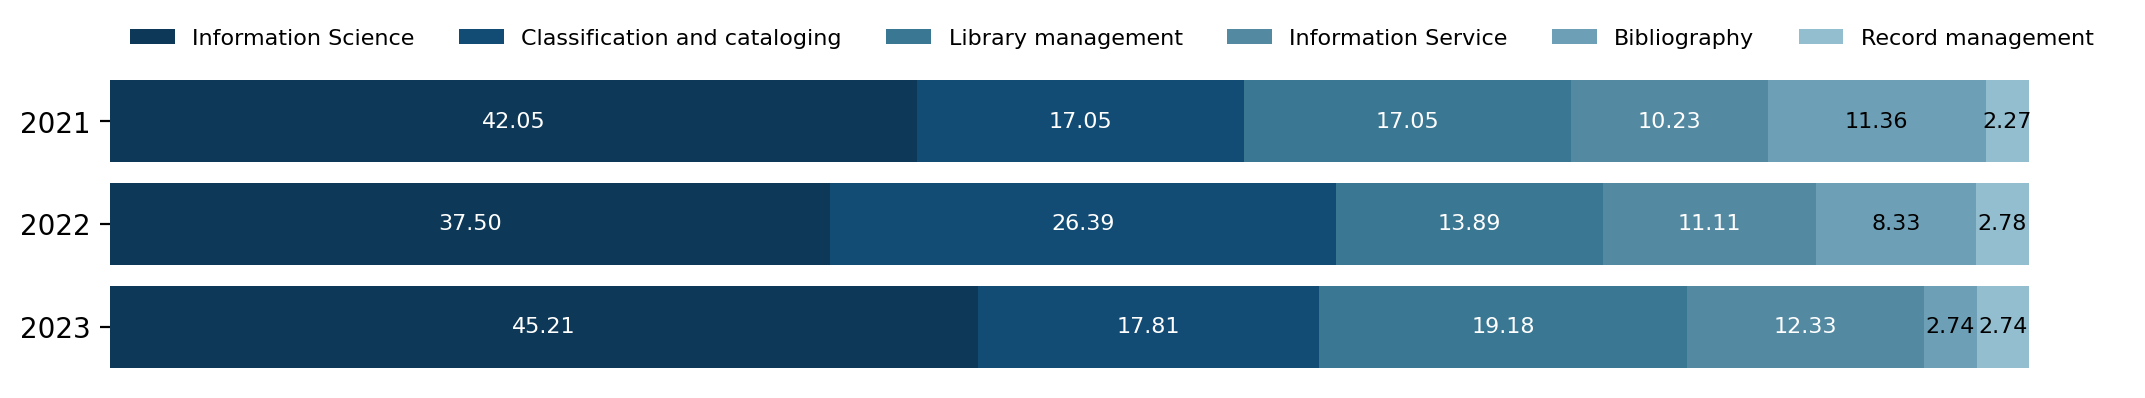

In [40]:
%config InlineBackend.figure_format = 'retina' 

fig, ax = plt.subplots(figsize=(13, 2))

palette=['#012a4a', '#013a63', '#014f86', '#2c7da0', '#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']
left_list=[pd.Series(np.zeros(len(df3), dtype=int))]
c=1

for response in likert_columns:
    sns.barplot(data=df3, x=response, y=df3.index, label=response, color=palette[c], orient='h', left=sum(left_list))
    left_list.append(df3[response].values)
    c=c+1
sns.despine(left=True, bottom=True)

# graph style & layout
ax.set_xlabel("")
ax.set_ylabel("")
for container in ax.containers[:-2]:
  ax.bar_label(container,label_type='center',fontsize=8,color='white',fmt = '%.2f')

ax.bar_label(ax.containers[-2],label_type='center',fontsize=8,color='black',fmt = '%.2f')
ax.bar_label(ax.containers[-1],label_type='center',fontsize=8,color='black',fmt = '%.2f')

plt.legend(loc='upper left', bbox_to_anchor=(0,1.2),ncol=len(df3.columns),fontsize = 8,frameon=False,)
ax.axes.xaxis.set_visible(False)
ax.tick_params(labelsize=10)

plt.show()

## Employments

### Q: What specific activities or preparations are you currently undertaking/did you previously engage in to position yourself for your desired career path?

In [41]:
df_students = df_eng.loc[df_eng['Please indicate your graduation status.'].isin(['Undergraduate students', 'Graduate students'])]

df4 = count_to(df_students, 'What specific activities or preparations are you currently undertaking/did you previously engage in to position yourself for your desired career path?', 'Year')

df4 = df4.pivot_table(index='Year', columns='Answer', values='Percent', aggfunc='sum')
column_sums = df4.sum()

sorted_columns = column_sums.sort_values(ascending=False).index
df4 = df4[sorted_columns]
likert_columns = df4.columns
df4

Answer,Grades,Earn certifications,Extracurricular activities (clubs/sororities/societies/studies/etc.),Language preparation,External activities (supporters/societies/clubs/studies/etc.),Practical exercise/Internship,Volunteer activity,Other
Year,,,,,,,,
2021,26.46,19.58,13.76,11.64,9.52,7.41,7.94,3.70
2022,29.69,18.75,14.06,10.16,10.16,7.03,7.03,3.12
2023,25.32,18.18,13.64,11.69,13.64,13.64,3.25,0.65


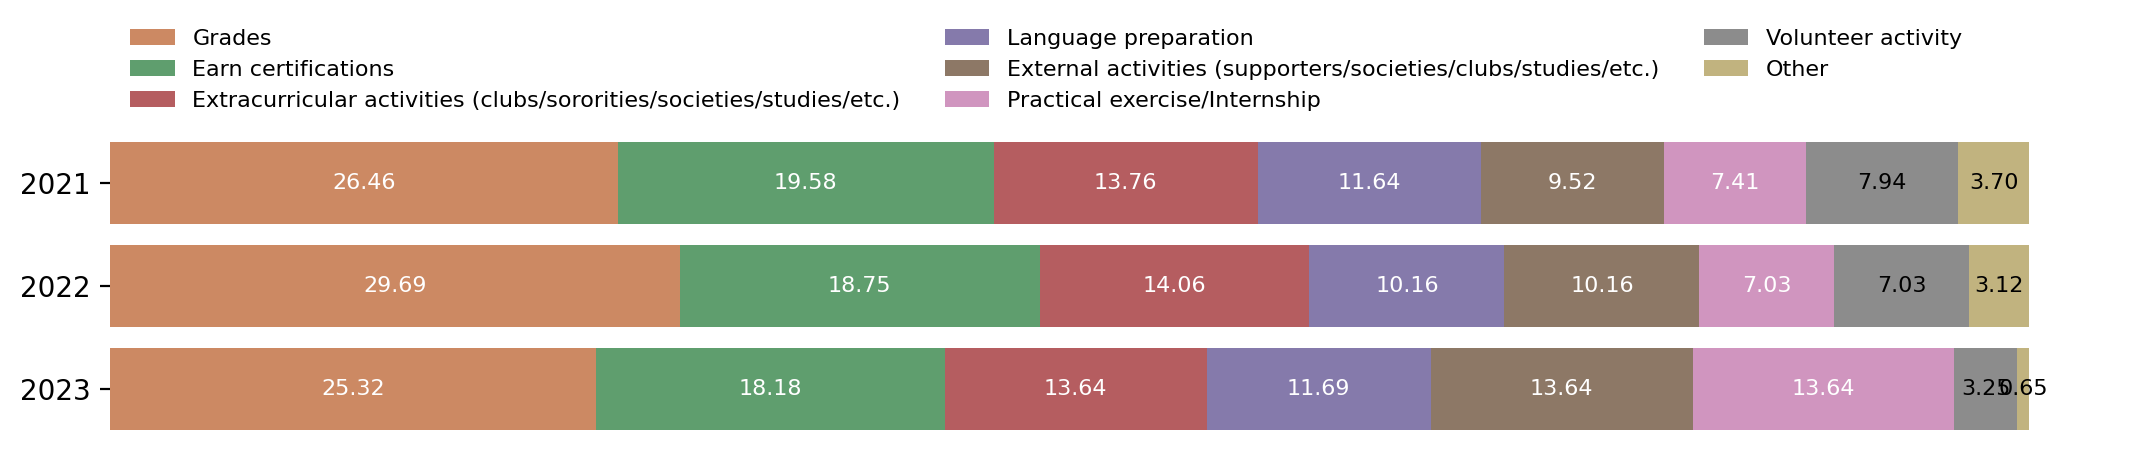

In [42]:
%config InlineBackend.figure_format = 'retina' 
fig, ax = plt.subplots(figsize=(13, 2))

palette = sns.color_palette('deep')
left_list=[pd.Series(np.zeros(len(df4), dtype=int))]
c=1
for response in likert_columns:
    sns.barplot(data=df4, x=response, y=df4.index, label=response, color=palette[c], orient='h', left=sum(left_list))
    left_list.append(df4[response].values)
    c=c+1
sns.despine(left=True, bottom=True)

# graph style & layout
ax.set_xlabel("")
ax.set_ylabel("")
for container in ax.containers[:-2]:
  ax.bar_label(container,label_type='center',fontsize=8,color='white',fmt = '%.2f')

ax.bar_label(ax.containers[-2],label_type='center',fontsize=8,color='black',fmt = '%.2f')
ax.bar_label(ax.containers[-1],label_type='center',fontsize=8,color='black',fmt = '%.2f')

plt.legend(loc='upper left', bbox_to_anchor=(0,1.4), ncol=3, fontsize=8, frameon=False,)
ax.axes.xaxis.set_visible(False)
ax.tick_params(labelsize=10)

plt.show()

### Q: What annual salary range are you hoping for or currently earning?

In [43]:
df_students = df_eng.loc[df_eng['Please indicate your graduation status.'].isin(['Undergraduate students', 'Graduate students'])]
df5 = count_to(df_students, 'What annual salary range are you hoping for or currently earning?', 'Year').sort_values(by='Answer')

df5

,Answer,Count,Year,Percent
23,Over 20 million won and under 25 million won,3,2023,4.11
14,Over 20 million won and under 25 million won,3,2022,4.17
5,Over 20 million won and under 25 million won,5,2021,5.68
1,Over 25 million won and under 30 million won,20,2021,22.73
22,Over 25 million won and under 30 million won,4,2023,5.48
9,Over 25 million won and under 30 million won,16,2022,22.22
16,Over 30 million won and under 35 million won,17,2023,23.29
10,Over 30 million won and under 35 million won,15,2022,20.83
0,Over 30 million won and under 35 million won,21,2021,23.86
2,Over 35 million won and under 40 million won,14,2021,15.91


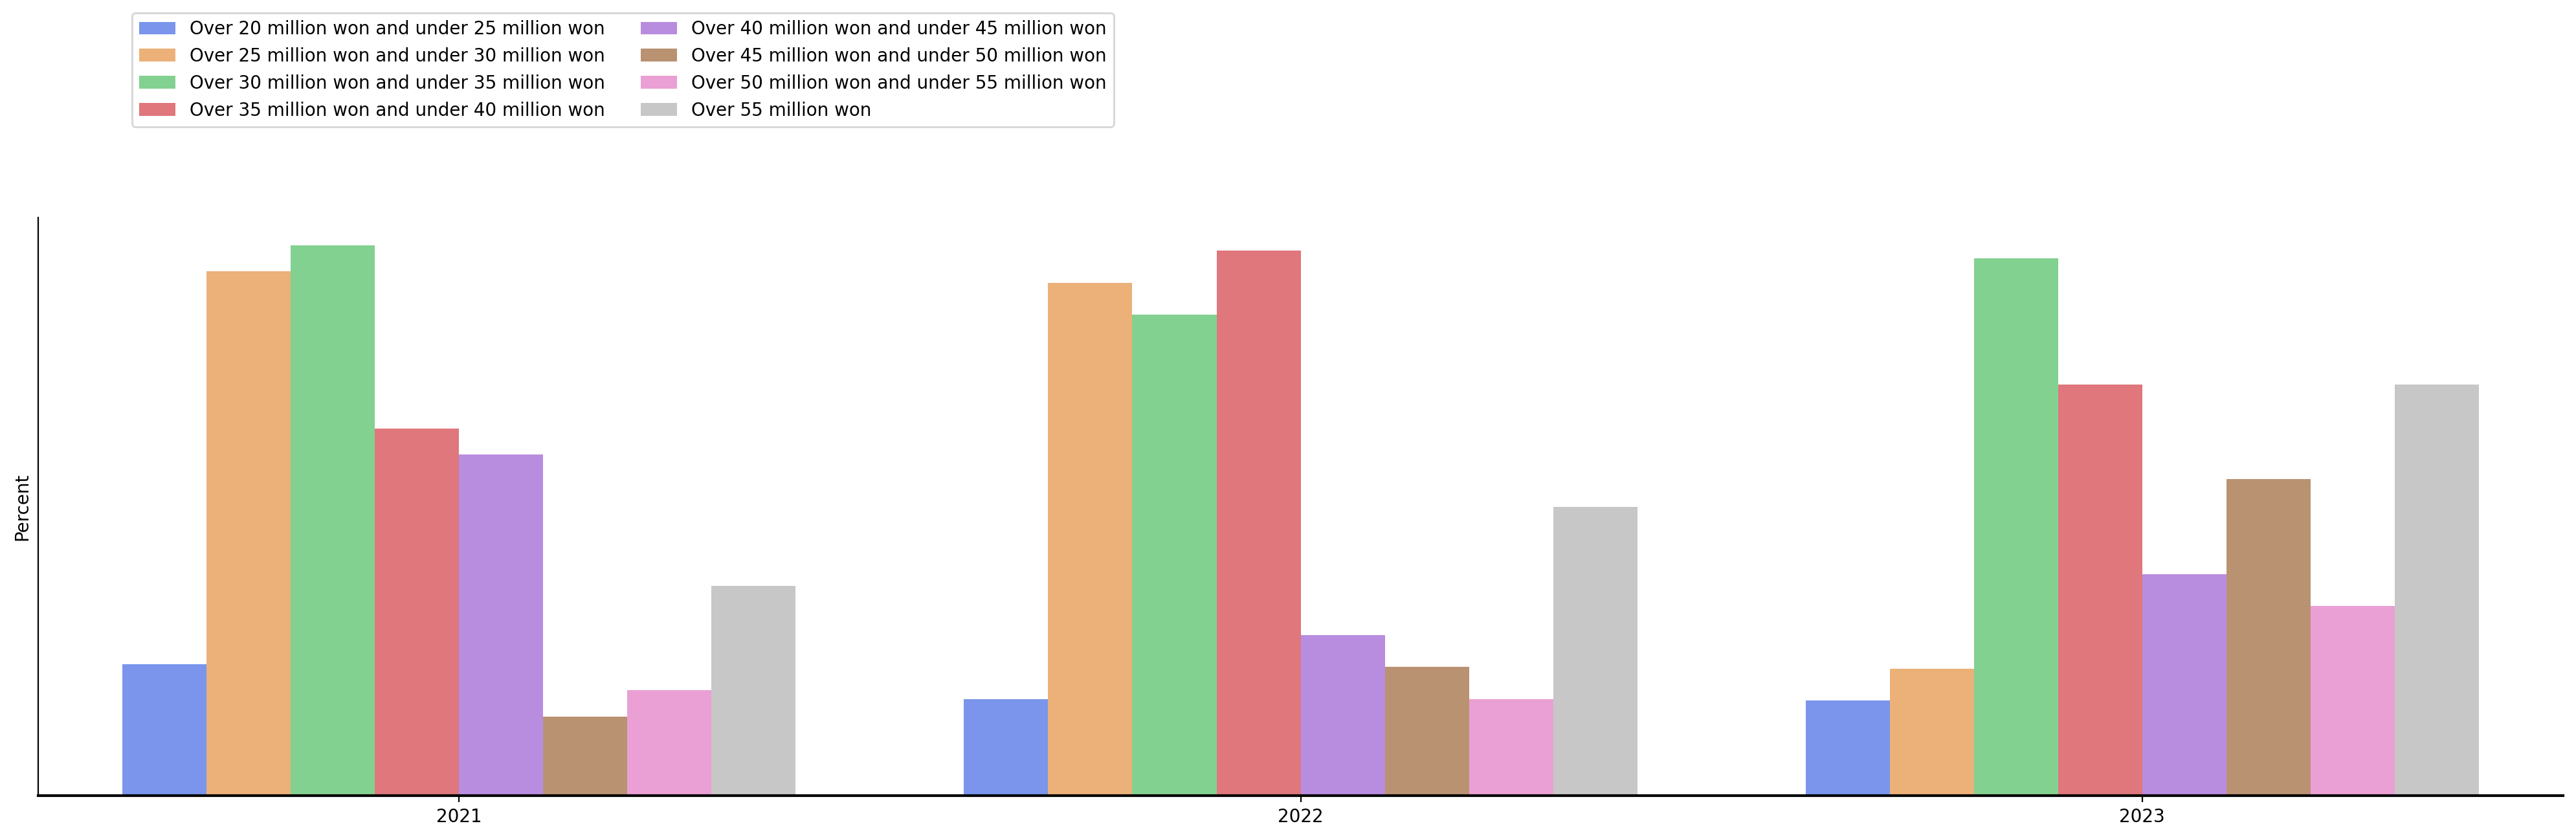

In [44]:
%config InlineBackend.figure_format = 'retina'

f, (ax1) = plt.subplots(1, 1, figsize=(20, 5), sharex=True)

sns.barplot(
    data=df5, x="Year", y="Percent", hue="Answer",
    errorbar=None, palette='bright', alpha=.6, ax=ax1
)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Percent")
ax1.set_xlabel("")
ax1.legend().remove()

handles, labels = ax1.get_legend_handles_labels()
f.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.05, 1.3), shadow=False, ncol=2, prop={'size': 10})

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

plt.show()


## Graduate Education

### Q: Are you considering going to graduate school, or have you already attended?

In [45]:
df_students = df_eng.loc[df_eng['Please indicate your graduation status.'].isin(['Undergraduate students'])]
df6 = count_to(df_students, 'Are you considering going to graduate school, or have you already attended?', 'Year').sort_values(by='Answer')

df6

,Answer,Count,Year,Percent
0,No,52,2021,69.33
2,No,50,2022,73.53
4,No,50,2023,74.63
1,Yes,23,2021,30.67
3,Yes,18,2022,26.47
5,Yes,17,2023,25.37


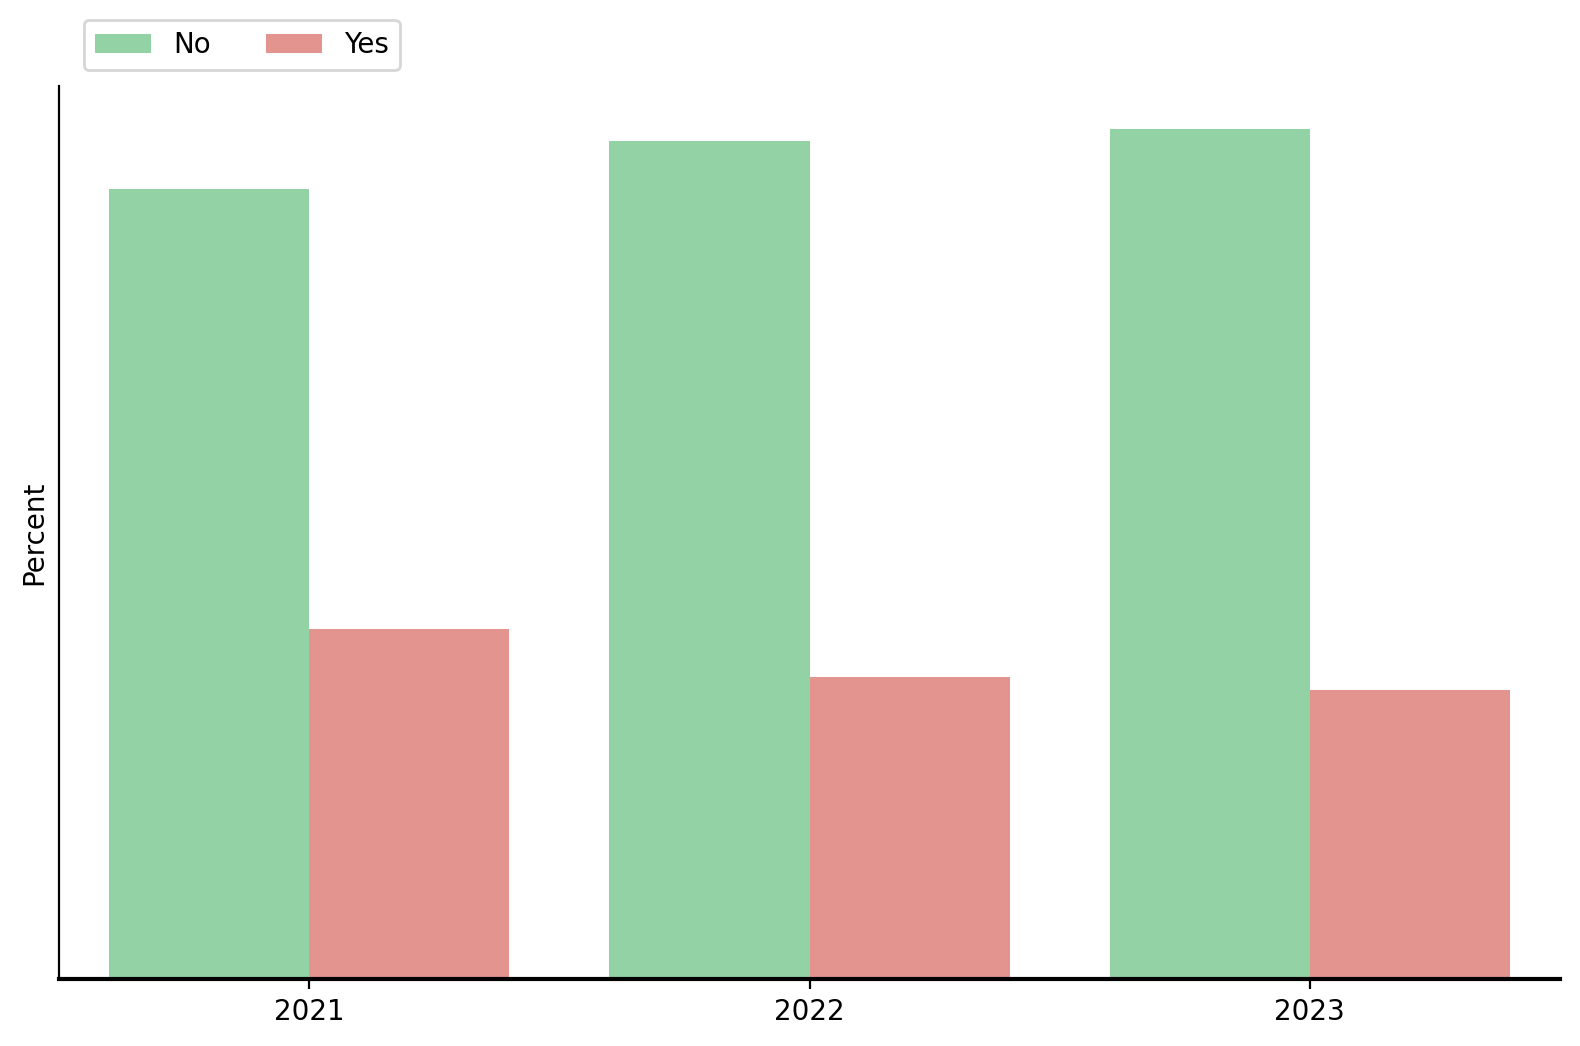

In [46]:
%config InlineBackend.figure_format = 'retina'

custom_palette=['#39c661','#ea382c']

f, (ax1) = plt.subplots(1, 1, figsize=(8, 5), sharex=True)

sns.barplot(
    data=df6, x="Year", y="Percent", hue="Answer",
    errorbar=None, palette=custom_palette, alpha=.6, ax=ax1
)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Percent")
ax1.set_xlabel("")
ax1.legend().remove()

handles, labels = ax1.get_legend_handles_labels()
f.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.05, 1.05), shadow=False, ncol=2, prop={'size': 10})

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

plt.show()


### Q: What is the purpose of attending graduate school?	

In [47]:
df_students = df_eng.loc[df_eng['Please indicate your graduation status.'].isin(['Undergraduate students'])]
df7 = count_to(df_students, 'What is the purpose of attending graduate school?', 'Year').sort_values(by='Answer')

df7

,Answer,Count,Year,Percent
14,Changed desired career field,1,2023,2.86
2,Get ready for work,9,2021,23.08
5,Get ready for work,11,2022,33.33
9,Get ready for work,9,2023,25.71
3,Other,2,2021,5.13
7,Other,1,2022,3.03
13,Other,1,2023,2.86
1,Self-development,9,2021,23.08
6,Self-development,4,2022,12.12
10,Self-development,4,2023,11.43


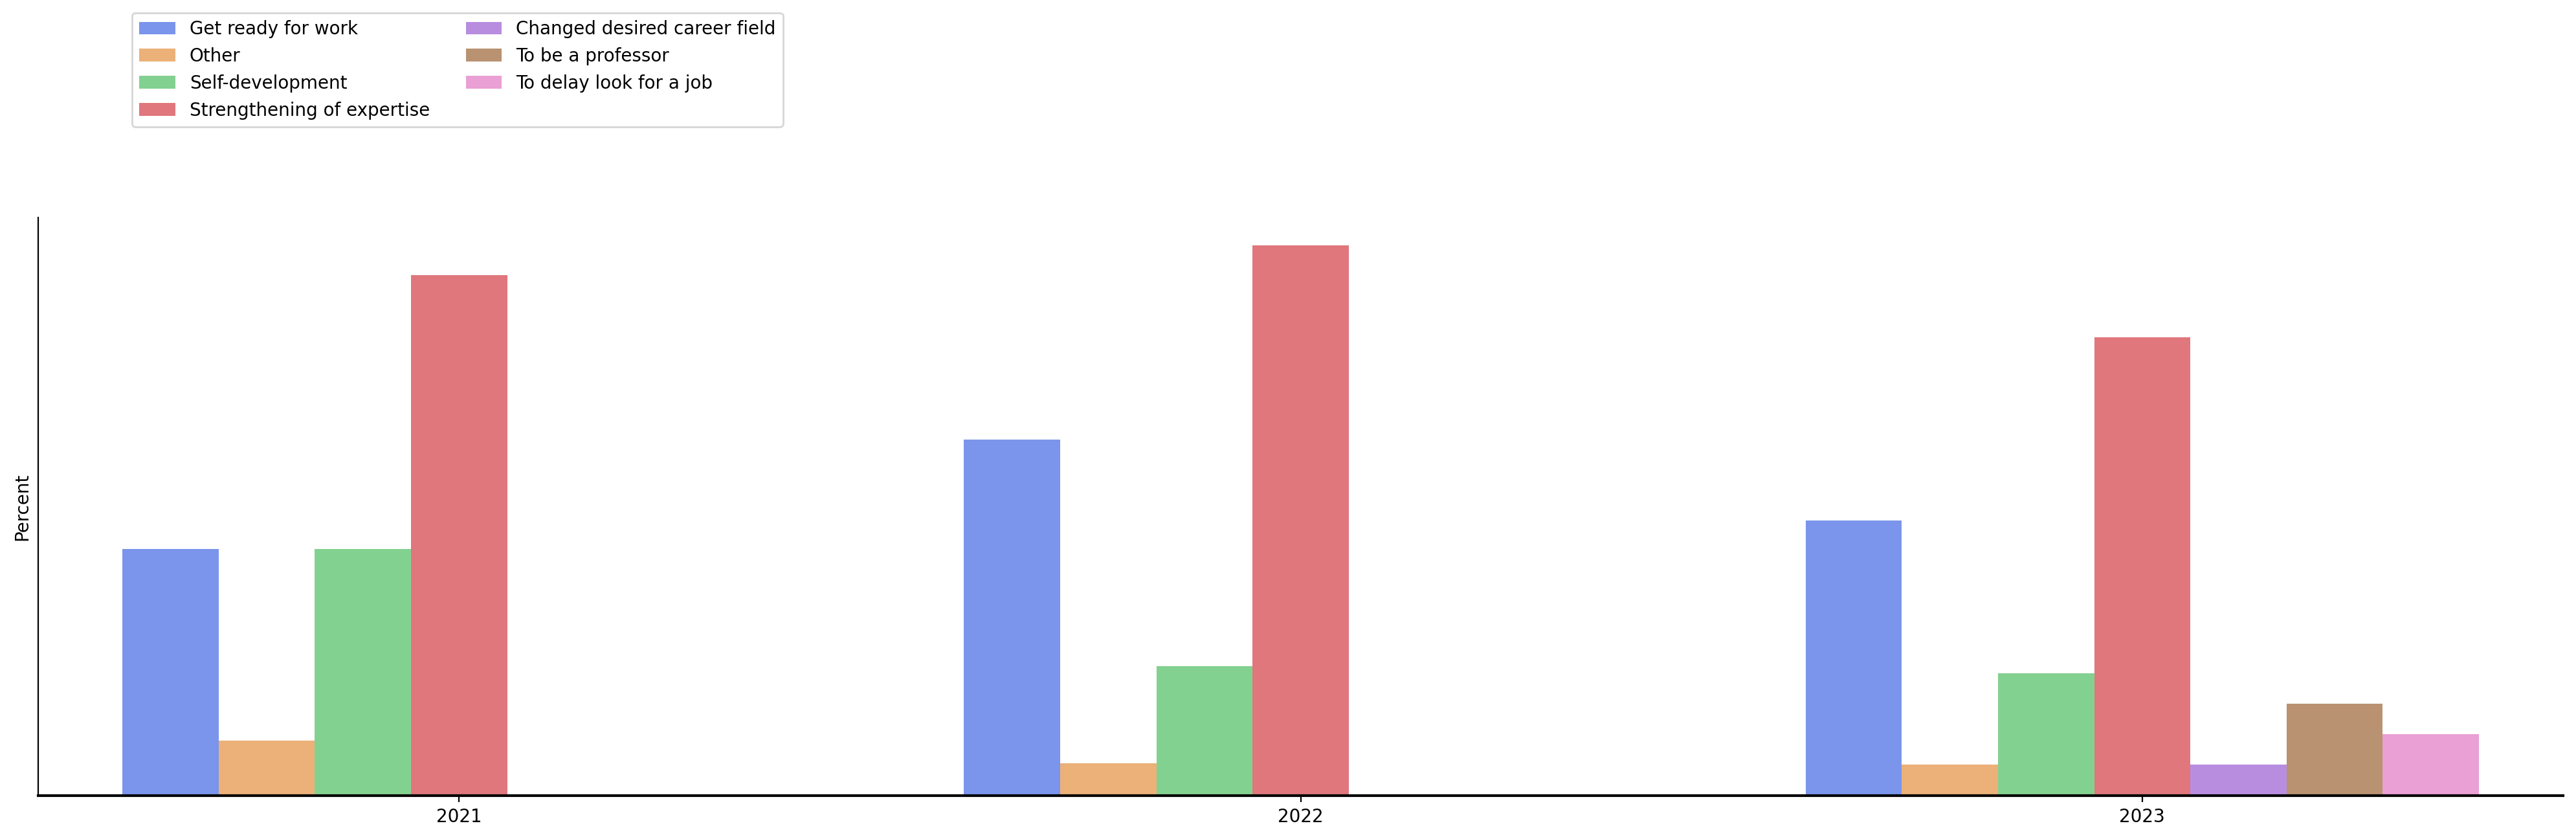

In [48]:
%config InlineBackend.figure_format = 'retina'

f, (ax1) = plt.subplots(1, 1, figsize=(20, 5), sharex=True)

sns.barplot(
    data=df7, x="Year", y="Percent", hue="Answer",
    errorbar=None, palette='bright', alpha=.6, ax=ax1
)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Percent")
ax1.set_xlabel("")
ax1.legend().remove()

handles, labels = ax1.get_legend_handles_labels()
f.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.05, 1.3), shadow=False, ncol=2, prop={'size': 10})

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

plt.show()
